In [1]:
import requests

In [6]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = 'https://api.tiingo.com/tiingo/daily/' + stock_symbol + '/prices?'
    api_key = '387fd657063535f02ef5a5700aadd0b9286572e9'
    payload = {
        'token': api_key,
        'startDate': start_date,
        'endDate': end_date
    }
    response = requests.get(base_url, params=payload)
    return response

In [8]:
data_response = get_stock_data('MSFT', '2019-3-25', '2019-4-25')
print(data_response.url)
print(data_response.json())

https://api.tiingo.com/tiingo/daily/MSFT/prices?token=387fd657063535f02ef5a5700aadd0b9286572e9&startDate=2019-3-25&endDate=2019-4-25
[{'date': '2019-03-25T00:00:00.000Z', 'close': 117.66, 'high': 118.01, 'low': 116.3224, 'open': 116.56, 'volume': 27067117, 'adjClose': 116.1178635392, 'adjHigh': 116.4632761878, 'adjLow': 114.7977950854, 'adjOpen': 115.0322809292, 'adjVolume': 27067117, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-03-26T00:00:00.000Z', 'close': 117.91, 'high': 118.705, 'low': 116.85, 'open': 118.62, 'volume': 26097665, 'adjClose': 116.3645868597, 'adjHigh': 117.1491670187, 'adjLow': 115.3184799809, 'adjOpen': 117.0652810897, 'adjVolume': 26097665, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-03-27T00:00:00.000Z', 'close': 116.77, 'high': 118.21, 'low': 115.5215, 'open': 117.875, 'volume': 22733427, 'adjClose': 115.2395285184, 'adjHigh': 116.6606548442, 'adjLow': 114.007392256, 'adjOpen': 116.3300455948, 'adjVolume': 22733427, 'divCash': 0.0, 'splitFactor': 

In [11]:
def decode_data(response):
    json_response = response.json()
    dates = []
    highs = []
    lows = []
    for json_object in json_response:
        date = json_object['date']
        high = json_object['high']
        low = json_object['low']
        dates.append(date)
        highs.append(high)
        lows.append(low)
        
    return dates, highs, lows    

In [12]:
dates, highs, lows = decode_data(data_response)
print(dates)

['2019-03-25T00:00:00.000Z', '2019-03-26T00:00:00.000Z', '2019-03-27T00:00:00.000Z', '2019-03-28T00:00:00.000Z', '2019-03-29T00:00:00.000Z', '2019-04-01T00:00:00.000Z', '2019-04-02T00:00:00.000Z', '2019-04-03T00:00:00.000Z', '2019-04-04T00:00:00.000Z', '2019-04-05T00:00:00.000Z', '2019-04-08T00:00:00.000Z', '2019-04-09T00:00:00.000Z', '2019-04-10T00:00:00.000Z', '2019-04-11T00:00:00.000Z', '2019-04-12T00:00:00.000Z', '2019-04-15T00:00:00.000Z', '2019-04-16T00:00:00.000Z', '2019-04-17T00:00:00.000Z', '2019-04-18T00:00:00.000Z', '2019-04-22T00:00:00.000Z', '2019-04-23T00:00:00.000Z', '2019-04-24T00:00:00.000Z', '2019-04-25T00:00:00.000Z']


In [13]:
import matplotlib.pyplot as plt

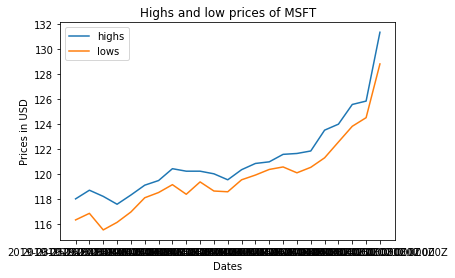

In [16]:
plt.plot(dates, highs, label='highs')
plt.plot(dates, lows, label='lows')
plt.title('Highs and low prices of MSFT')
plt.xlabel('Dates')
plt.ylabel('Prices in USD')
plt.legend(loc='upper left')
plt.show()